# salary prediction 


![](pexels-pixabay-373543.jpg)

## IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Dataset

In [2]:
df=pd.read_csv("survey_results_public.csv")

## show some of data

In [3]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


## Import Necessary Data  & **Renaming columes appropriately**

In [4]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


## Columns description

1. **Country** contains the name of country

2. **EdLevel** contains the type of education (EX:B,M ,..)

3. **YearsCodePro** contains the year of experiance for coding

4. **Employment** contains type of employee and position (EX:Student- full-time,Employed full-time,....)

5. **Country** contains the salary  of employee (Target)

In [5]:
df["Salary"] = df["Salary"].fillna(df['Salary'].mean())


## Checking null values

In [6]:
df.isnull().sum()

Country             0
EdLevel           313
YearsCodePro    22223
Employment        116
Salary              0
dtype: int64

## Drop null values

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61110 entries, 4 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       61110 non-null  object 
 1   EdLevel       61110 non-null  object 
 2   YearsCodePro  61110 non-null  object 
 3   Employment    61110 non-null  object 
 4   Salary        61110 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


In [10]:
df.duplicated().sum()

16571

## Deleting Unnnecessary Columns


In [11]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)


In [12]:
df['Country'].value_counts()

United States of America                                10877
India                                                    5764
Germany                                                  3427
United Kingdom of Great Britain and Northern Ireland     3102
Canada                                                   1887
                                                        ...  
Guinea                                                      1
Central African Republic                                    1
Dominica                                                    1
Saint Kitts and Nevis                                       1
Burundi                                                     1
Name: Country, Length: 170, dtype: int64

In [13]:
def reduce_country(categories, cutoff):
    new_country = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            new_country[categories.index[i]] = categories.index[i]
        else:
            new_country[categories.index[i]] = 'Other'
    return new_country

In [14]:
df['Country'] = df['Country'].apply(lambda x: x.replace('Israel','Palestin')) 


In [15]:
country_map = reduce_country(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                10877
Other                                                   10436
India                                                    5764
Germany                                                  3427
United Kingdom of Great Britain and Northern Ireland     3102
Canada                                                   1887
France                                                   1686
Brazil                                                   1539
Australia                                                1052
Spain                                                    1047
Netherlands                                              1046
Italy                                                     993
Russian Federation                                        963
Poland                                                    942
Sweden                                                    849
Palestin                                                  602
Turkey  


# Visualisations

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize': [12, 12]}, font_scale=1.2)

<AxesSubplot:xlabel='count', ylabel='Country'>

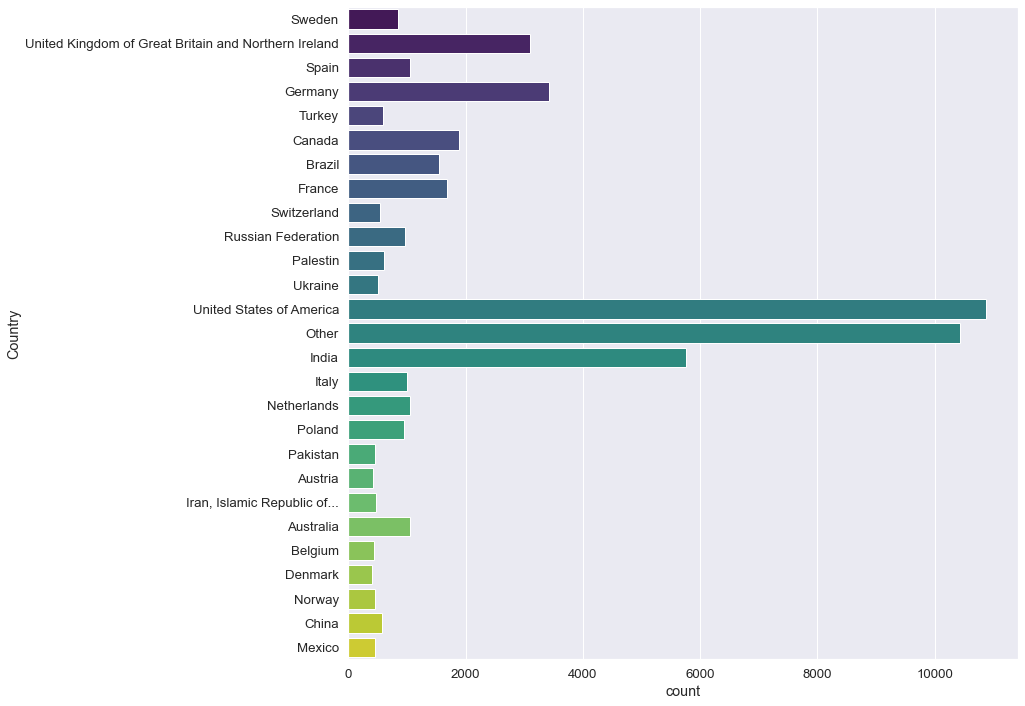

In [17]:

sns.countplot(y=df["Country"],data=df,palette='viridis')


In [18]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

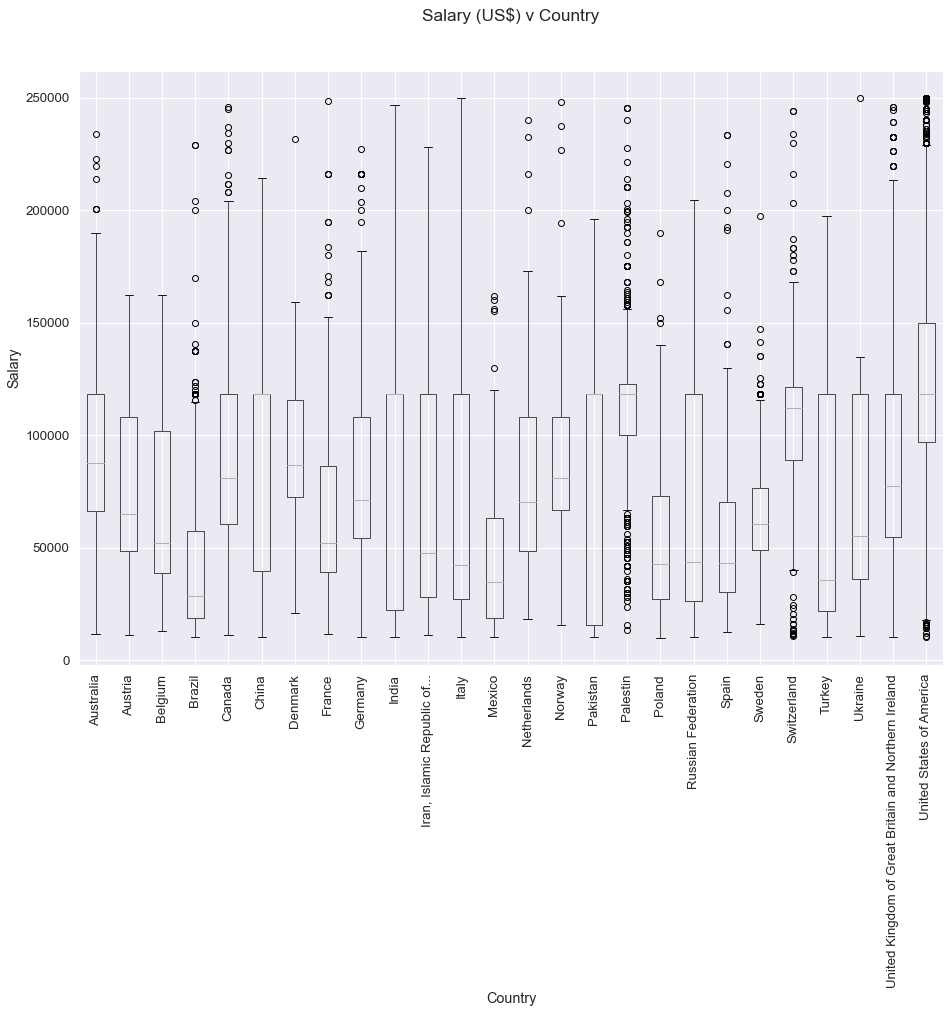

In [19]:
fig, ax = plt.subplots(1,1, figsize=(15, 11))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [20]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [21]:
df["YearsCodePro"].unique()

array(['4', '10', '5', '6', '2', '9', '18', '12', '21', '16',
       'Less than 1 year', '3', '15', '7', '8', '17', '1', '14', '26',
       '25', '20', '34', '11', '24', '22', '13', '39', '27', '23', '30',
       '19', '35', '31', '33', '37', '32', '43', '40', '29', '38', '42',
       '28', '46', '36', '47', '45', '44', '41', 'More than 50 years',
       '50', '48', '49'], dtype=object)

In [22]:
def edit_exp(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(edit_exp)

In [23]:
df['YearsCodePro'].unique()

array([ 4. , 10. ,  5. ,  6. ,  2. ,  9. , 18. , 12. , 21. , 16. ,  0.5,
        3. , 15. ,  7. ,  8. , 17. ,  1. , 14. , 26. , 25. , 20. , 34. ,
       11. , 24. , 22. , 13. , 39. , 27. , 23. , 30. , 19. , 35. , 31. ,
       33. , 37. , 32. , 43. , 40. , 29. , 38. , 42. , 28. , 46. , 36. ,
       47. , 45. , 44. , 41. , 50. , 48. , 49. ])

In [24]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Primary/elementary school',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [25]:
def edit_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(edit_education)

In [26]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Country'>

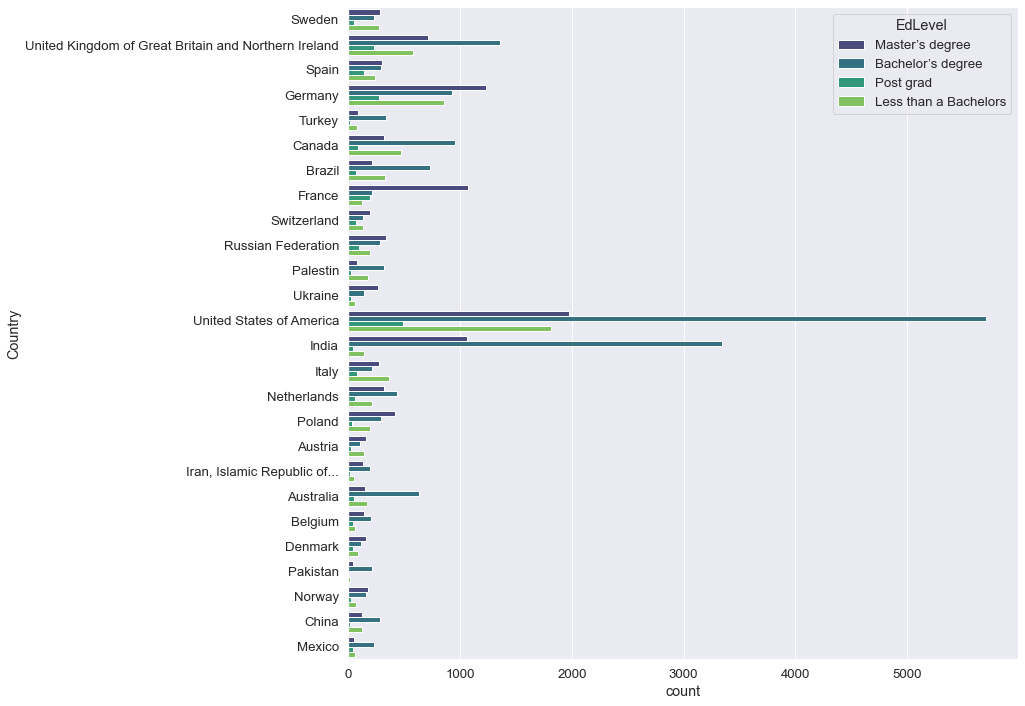

In [27]:
sns.countplot(hue="EdLevel",data=df,y="Country",palette='viridis')


## show relationship

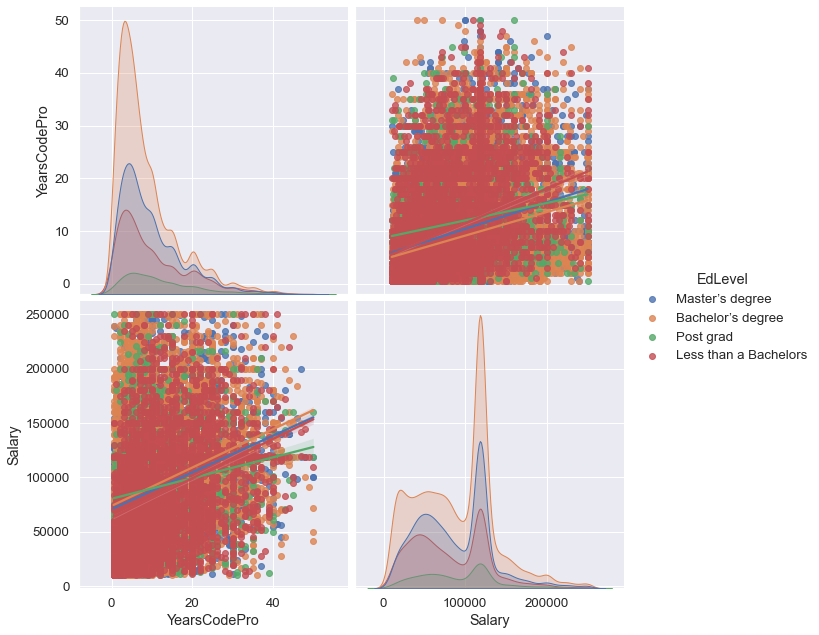

In [28]:
sns.pairplot(data=df,hue="EdLevel",kind='reg',height=4.5)

## to measure the distribution of relationship

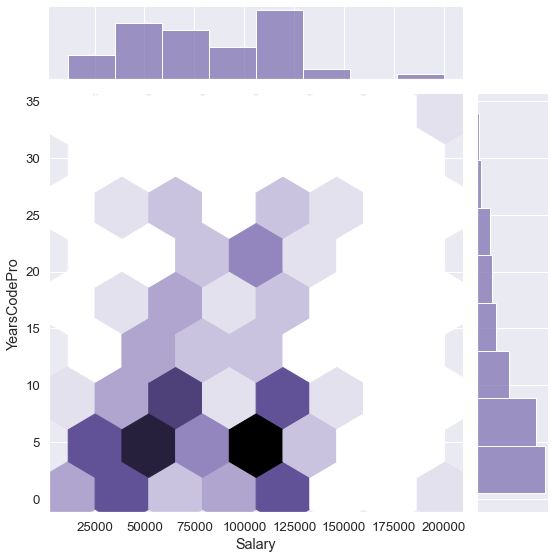

In [29]:
sns.jointplot(x='Salary', y='YearsCodePro', data=df.head(100), kind='hex', height=8, color='m')

<AxesSubplot:xlabel='EdLevel', ylabel='Salary'>

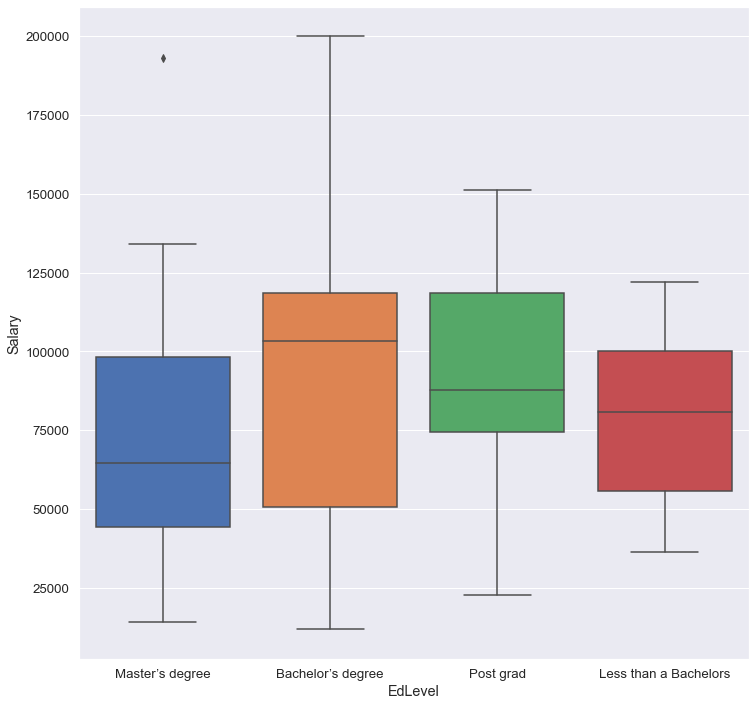

In [30]:
sns.boxplot(x="EdLevel", y="Salary", data=df.head(100),saturation=2.75)

In [31]:
df.corr()

,YearsCodePro,Salary
YearsCodePro,1.000000,0.284442
Salary,0.284442,1.000000


<AxesSubplot:>

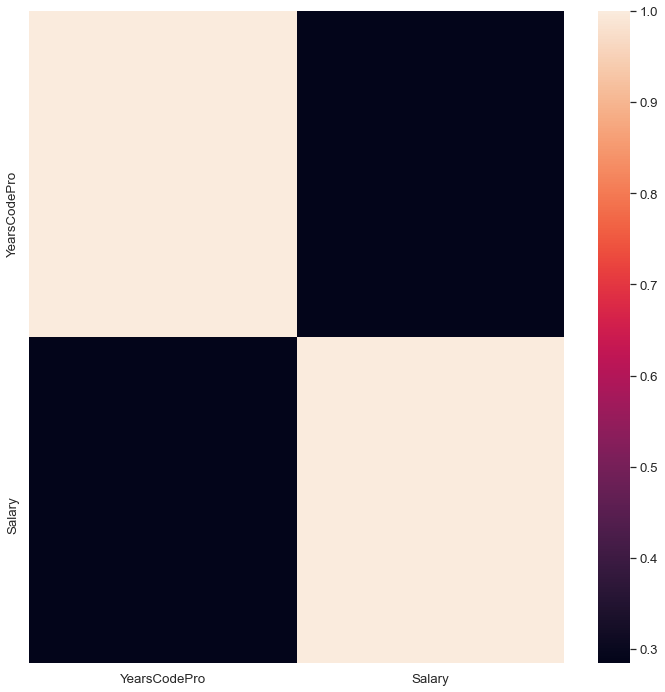

In [32]:
sns.heatmap(df.corr())

## preprocessing


In [33]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.a

array([2, 0, 3, 1])

In [34]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([20, 24, 19,  8, 22,  4,  3,  7, 21, 18, 16, 23, 25,  9, 11, 13, 17,
        1, 10,  0,  2,  6, 15, 14,  5, 12])

## machine learning model


In [35]:
X=df.drop('Salary',axis=1)

In [36]:
Y=df["Salary"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [39]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
    
}

In [40]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')
#     print(f'MSE: {model.mean_squared_error(y_test, y_pred)}')
    print('Root Mean Squared Error:${:,.02f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('R2_score:',r2_score(y_test,y_pred))
    print('-'*30)

Using model: LR
Training Score: 0.17179205458046432
Test Score: 0.1751371340932486
Root Mean Squared Error:$42,823.29
R2_score: 0.1751371340932486
------------------------------
Using model: KNNR
Training Score: 0.326321695608632
Test Score: 0.25123028283898197
Root Mean Squared Error:$40,800.29
R2_score: 0.25123028283898197
------------------------------
Using model: SVR
Training Score: 0.029216570568794564
Test Score: 0.029224829877932623
Root Mean Squared Error:$46,456.71
R2_score: 0.029224829877932623
------------------------------
Using model: DT
Training Score: 0.42188624922564666
Test Score: 0.30531513001912014
Root Mean Squared Error:$39,299.14
R2_score: 0.30531513001912014
------------------------------
Using model: RF
Training Score: 0.4190032767828289
Test Score: 0.322596332912491
Root Mean Squared Error:$38,807.25
R2_score: 0.322596332912491
------------------------------


In [41]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12] #sequence of parameter settings.
parameters = {"max_depth": max_depth} 

regressor = RandomForestRegressor()
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x_train ,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [42]:
regressor = gs.best_estimator_

regressor.fit(x_train ,y_train)
y_pred = regressor.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$38,007.67


In [43]:
model=RandomForestRegressor()

In [44]:
model.fit(x_train,y_train)


RandomForestRegressor()

In [45]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [46]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[25.,  2., 15.]])

In [47]:
y_pred = model.predict(X)
y_pred

array([139172.56014856])

In [48]:
import pickle

In [49]:
data = {"model": model, "le_country": le_country, "le_education": le_education}
with open('saved_steps_1.pkl', 'wb') as file:
    pickle.dump(data, file)

In [51]:
with open('saved_steps_1.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [52]:
y_predict=model_loaded.predict(X)
y_predict

array([139172.56014856])

In [25]:
!jt -t gruvboxd

In [24]:
!jt -r

Reset css and font defaults in:
C:\Users\DELL\.jupyter\custom &
C:\Users\DELL\AppData\Roaming\jupyter\nbextensions
